In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

plt.style.use('ggplot')

In [3]:
df_match_out = pd.read_csv('data/match_outcomes.csv')
df_match_out

,match_id,account_id_0,account_id_1,account_id_2,account_id_3,account_id_4,start_time,parser_version,win,rad
0,1636204962,34549,0,0,-51743434,-120875154,1437014585,12,1,0
1,1636204962,0,61598,138825,0,207232,1437014585,12,0,1
2,1636322679,0,-44943233,-240360907,19599,0,1437019968,12,0,0
3,1636322679,-97530201,0,0,0,-116349387,1437019968,12,1,1
4,1637385965,0,0,0,104738,0,1437052551,12,1,0
...,...,...,...,...,...,...,...,...,...,...
1828583,1930327119,2898,0,4161,27088,0,1447311134,14,0,0
1828584,1930333522,276597,47600,26597,-191452592,147872,1447311476,14,1,1
1828585,1930333522,35144,-198295236,41272,0,151139,1447311476,14,0,0
1828586,1930334829,0,2850,-119710321,188881,0,1447311544,14,0,0


In [7]:
df_match_out[df_match_out['account_id_0'] == 34549]

,match_id,account_id_0,account_id_1,account_id_2,account_id_3,account_id_4,start_time,parser_version,win,rad
0,1636204962,34549,0,0,-51743434,-120875154,1437014585,12,1,0
536847,1805724007,34549,34550,263060,54216,-43114043,1442700966,12,0,0
715284,1819222019,34549,-34989428,54888,0,60278,1443200590,13,1,1
717355,1819338709,34549,0,-51926652,111621,-174427345,1443203842,13,0,0
1075247,1841412558,34549,0,0,89087,0,1443937379,13,0,1


In [8]:
df_match = pd.read_csv('data/match.csv')
df_match

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132
3,3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191
4,4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,1447829192,3025,1824,0,0,63,117,22,True,0,0,111
49996,49996,1447829181,1451,1982,384,48,63,147,22,True,0,0,204
49997,49997,1447829197,2672,1830,0,0,63,130,22,True,0,0,111
49998,49998,1447829189,2211,1982,4,3,63,645,22,True,0,0,151


In [5]:
df_player_time = pd.read_csv('data/player_time.csv')
df_player_time


,version https://git-lfs.github.com/spec/v1
0,oid sha256:ac14667b21a96f498110c8488a177e41ecc...
1,size 318533958


In [1]:
df_player_time['times'].iloc[20]

NameError: name 'df_player_time' is not defined

In [7]:
df_player_time.columns

Index(['match_id', 'times', 'gold_t_0', 'lh_t_0', 'xp_t_0', 'gold_t_1',
       'lh_t_1', 'xp_t_1', 'gold_t_2', 'lh_t_2', 'xp_t_2', 'gold_t_3',
       'lh_t_3', 'xp_t_3', 'gold_t_4', 'lh_t_4', 'xp_t_4', 'gold_t_128',
       'lh_t_128', 'xp_t_128', 'gold_t_129', 'lh_t_129', 'xp_t_129',
       'gold_t_130', 'lh_t_130', 'xp_t_130', 'gold_t_131', 'lh_t_131',
       'xp_t_131', 'gold_t_132', 'lh_t_132', 'xp_t_132'],
      dtype='object')

In [9]:
df_player_time[df_player_time['match_id']==50]


,match_id,times,gold_t_0,lh_t_0,xp_t_0,gold_t_1,lh_t_1,xp_t_1,gold_t_2,lh_t_2,...,xp_t_129,gold_t_130,lh_t_130,xp_t_130,gold_t_131,lh_t_131,xp_t_131,gold_t_132,lh_t_132,xp_t_132
2276,50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2277,50,60,142,1,62,200,0,182,231,3,...,182,144,1,227,138,1,124,100,0,0
2278,50,120,640,2,352,380,2,388,331,3,...,388,412,5,640,317,3,401,200,0,277
2279,50,180,780,3,582,480,2,423,431,3,...,526,608,6,867,538,6,545,300,0,421
2280,50,240,1000,6,768,580,2,500,531,3,...,732,913,11,1409,1021,15,928,400,0,804
2281,50,300,1176,8,1056,680,2,562,631,3,...,1002,1154,13,1768,1698,16,1446,636,0,1198
2282,50,360,1501,10,1290,969,4,710,966,5,...,1196,1338,15,2160,2003,21,1703,736,0,1424
2283,50,420,1720,13,1531,1131,4,821,1105,6,...,1406,1722,21,2537,2515,27,1998,894,0,1719
2284,50,480,1897,15,1933,1312,6,1319,1205,6,...,1676,1901,21,2557,2903,28,2448,1036,1,1884
2285,50,540,2686,23,2707,1412,6,1494,1349,7,...,1738,2122,24,2970,3297,35,2943,1136,1,1884


In [10]:
df_objectives = pd.read_csv('data/objectives.csv')
chat_messages = df_objectives['subtype'].unique()
np.sort(df_objectives['player1'].unique())
df_objectives

,match_id,key,player1,player2,slot,subtype,team,time,value
0,0,NaN,0,6,0.0,CHAT_MESSAGE_FIRSTBLOOD,NaN,1,309
1,0,NaN,3,-1,3.0,CHAT_MESSAGE_TOWER_KILL,2.0,894,2
2,0,NaN,2,-1,NaN,CHAT_MESSAGE_ROSHAN_KILL,2.0,925,200
3,0,NaN,1,-1,1.0,CHAT_MESSAGE_AEGIS,NaN,925,0
4,0,NaN,7,-1,7.0,CHAT_MESSAGE_TOWER_KILL,3.0,1016,3
...,...,...,...,...,...,...,...,...,...
1173391,49999,64.0,-1,-1,NaN,CHAT_MESSAGE_BARRACKS_KILL,NaN,2565,64
1173392,49999,NaN,9,-1,9.0,CHAT_MESSAGE_TOWER_KILL,3.0,2611,3
1173393,49999,NaN,3,-1,NaN,CHAT_MESSAGE_ROSHAN_KILL,3.0,2707,200
1173394,49999,NaN,7,-1,7.0,CHAT_MESSAGE_AEGIS,NaN,2730,0


In [11]:
def TeamGoldTotals(match_id, time_index=-1):
    '''
    params:
    match_id = int corresponding to the match_id column
    time_index = index to grab gold totals at, default is the last timestamp of the match
    
    returns:
    2 ints of gold totals of team 1 and 2 at the end of the match.
    '''
    
    match_df = df_player_time[df_player_time['match_id']==match_id]
    team1 = (match_df.iloc[time_index][2] +
            match_df.iloc[time_index][5] +
            match_df.iloc[time_index][8] +
            match_df.iloc[time_index][11] +
            match_df.iloc[time_index][14])
    
    team2 = (match_df.iloc[time_index][17] +
            match_df.iloc[time_index][20] +
            match_df.iloc[time_index][23] +
            match_df.iloc[time_index][26] +
            match_df.iloc[time_index][29])
    
    return team1,team2

TeamGoldTotals(0)


(95212, 72847)

In [98]:
def GoldValsThruMatch(match_id):
    '''
    params:
    match_id = int corresponding to the match_id column
    
    returns 2 np.arrays with team gold values at each time interval
    and a np.array of list of time intervals in minutes(for graphing)
    '''
    
    match_df = df_player_time[df_player_time['match_id']==match_id]
    team1 = []
    team2 = []
    
    for i in range(len(match_df.index)):
        t1, t2 = TeamGoldTotals(match_id, i)
        team1.append(t1)
        team2.append(t2)
    
    return np.array(team1),np.array(team2), np.array(match_df['times']//60)

GoldValsThruMatch(50)

(array([    0,   872,  2290,  2975,  3891,  4878,  6687,  7797,  9135,
        11705, 13240, 14902, 15765, 17572, 18883, 20033, 22389, 23947,
        25609, 27315, 28560, 30314, 32211, 34114, 35233, 36287, 38623,
        40945, 42243, 44068, 45506, 47852, 49549, 52900, 56398, 59073,
        60798, 62802, 63058, 63058]),
 array([    0,   766,  1684,  2596,  3882,  5481,  6465,  7919,  9105,
        10100, 12509, 13740, 15880, 17172, 18919, 20815, 22867, 24655,
        25989, 29172, 30905, 33662, 35674, 37802, 40048, 42534, 47234,
        50044, 51610, 52978, 56090, 58601, 65703, 70038, 71500, 73814,
        75565, 81472, 82423, 82423]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]))

In [33]:
def GetMatchWinner(match_id):
    '''
    params:
    match_id=int of match_id primary key
    
    returns:
    string of team that won and string for plotting color. Team 1 corresponds to radiant, Team 2 corresponds to dire.
    '''
    #the indexes of df_match are idential to the match_id's in ascending order
    specific_match = df_match.iloc[match_id]
    if specific_match['radiant_win']:
        return 'Team 1','blue'
    else:
        return 'Team 2','red'

GetMatchWinner(50)

('Team 2', 'red')

In [44]:
df_objectives[df_objectives['subtype'] == 'CHAT_MESSAGE_ROSHAN_KILL']['player1']
roshdf = df_objectives[df_objectives['subtype'] == 'CHAT_MESSAGE_ROSHAN_KILL']
# roshdf[roshdf['match_id']==500]['player1'][roshdf['player1']==2]


roshkill_wins = {'rad_kills' : 0,
                 'dire_kills': 0,
                'rad_wins' : 0,
                'dire_wins' : 0,
                'kill_ties' : 0,
                'rad_tie_wins' : 0,
                'dire_tie_wins': 0}

for _id in roshdf['match_id'].unique():
    #slice into _id's rows only
    current_match = roshdf[roshdf['match_id']==_id]
    #get number of radiant and dire Roshan kills in current match
    current_rad_kills = len(current_match['player1'][current_match['player1']==2])
    current_dire_kills = len(current_match['player1'][current_match['player1']==3])
    #grabs match winner so i dont have to call it 3 times
    current_winner = GetMatchWinner(_id)[0]
    
    if current_rad_kills == current_dire_kills:
        roshkill_wins['kill_ties'] += 1
        
        if current_winner == 'Team 1':
            roshkill_wins['rad_tie_wins'] += 1
        else:
            roshkill_wins['dire_tie_wins'] += 1
        
    elif current_rad_kills > current_dire_kills:
        roshkill_wins['rad_kills'] += 1
        
        if current_winner == 'Team 1':
            roshkill_wins['rad_wins'] += 1
            
    elif current_dire_kills > current_rad_kills:
        roshkill_wins['dire_kills'] += 1
        
        if current_winner == 'Team 2':
            roshkill_wins['dire_wins'] += 1
            
roshkill_wins

{'rad_kills': 16487,
 'dire_kills': 23092,
 'rad_wins': 14550,
 'dire_wins': 18017,
 'kill_ties': 4408,
 'rad_tie_wins': 2494,
 'dire_tie_wins': 1914}

In [46]:
roshkill_wins['rad_kills']+roshkill_wins['dire_kills']+roshkill_wins['kill_ties']

43987

In [168]:
def GetRoshanWinPerc():
    #get total radiant and dire Roshan kills for all matches
    rosh_kills = df_objectives[df_objectives['subtype'] == 'CHAT_MESSAGE_ROSHAN_KILL']
    p1_rosh_kills = rosh_kills['player1']
    radiant_mask = p1_rosh_kills==2
    dire_mask = p1_rosh_kills==3
    radiant_kills = len(p1_rosh_kills[radiant_mask])
    dire_kills = len(p1_rosh_kills[dire_mask])
    
    #get number of 
    match_id_lst = rosh_kills['match_id'].unique()
    
    return radiant_kills, dire_kills, radiant_kills+dire_kills,len(match_id_lst)
GetRoshanWinPerc()

(31084, 45883, 76967, 76967)

/home/jaxon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


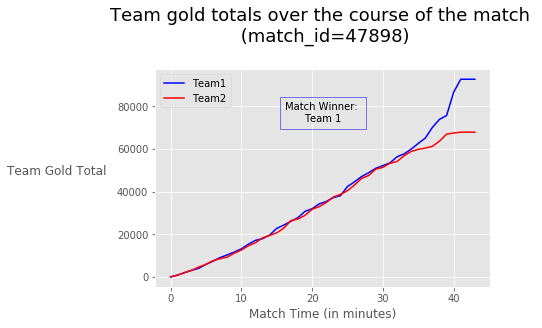

In [102]:
example_match = np.random.randint(0,50000)
winner,win_color = GetMatchWinner(example_match)
y1,y2,x = GoldValsThruMatch(example_match)

fig, ax = plt.subplots()

ax.plot(x,y1, label='Team1',color='blue')
ax.plot(x,y2, label='Team2',color='red')

#Formatting
ax.set_title('Team gold totals over the course of the match \n (match_id={})'.format(example_match),y=1.1,fontsize=18)
ax.set_xlabel('Match Time (in minutes)')
ax.set_ylabel('Team Gold Total', rotation=0, labelpad=60)
ax.text(0.5,.8,"Match Winner: \n" + winner,
        bbox=dict(edgecolor=win_color,facecolor='none',pad=5),
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes)
ax.legend()
fig.show();

In [170]:
df = pd.DataFrame([('bird', 'Falconiformes', 389.0),
                    ('bird', 'Psittaciformes', 24.0),
                    ('mammal', 'Carnivora', 80.2),
                    ('mammal', 'Primates', np.nan),
                    ('mammal', 'Carnivora', 58)],
                   index=['falcon', 'parrot', 'lion', 'monkey', 'leopard'],
                  columns=('class', 'order', 'max_speed'))
grouped = df.groupby('class')
grouped = df.groupby('order', axis='columns')
grouped = df.groupby(['class', 'order'])
